In [1]:
import pandas as pd
import numpy as np

def readDF(name):
    df = pd.read_csv('Data/SlicedData/' + name + '.csv')
    df = df.rename(columns = {'Unnamed: 0' : 'Index'})
    df = df.set_index('Index', drop = True)
    return df

df1 = readDF('df1')
df2 = readDF('df2')
df3 = readDF('df3')
df4 = readDF('df4')

returnTime = lambda df: np.linspace(0, len(df) / 2 - 0.5, len(df))
time1 = returnTime(df1)
time2 = returnTime(df2)
time3 = returnTime(df3)
time4 = returnTime(df4)

In [2]:
import copy

start = 150
end = 153
A = 15

df1_shock = copy.deepcopy(df1)
df1_shock[start:end] = (df1_shock[start:end] - np.mean(df1[start:end])) * A + np.mean(df1[start:end])
df2_shock = copy.deepcopy(df2)
df2_shock[start:end] = (df2_shock[start:end] - np.mean(df2[start:end])) * A + np.mean(df2[start:end])
df3_shock = copy.deepcopy(df3)
df3_shock[start:end] = (df3_shock[start:end] - np.mean(df3[start:end])) * A + np.mean(df3[start:end])
df4_shock = copy.deepcopy(df4)
df4_shock[start:end] = (df4_shock[start:end] - np.mean(df4[start:end])) * A + np.mean(df4[start:end])

/Users/zerohertz/miniforge3/envs/analysis/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


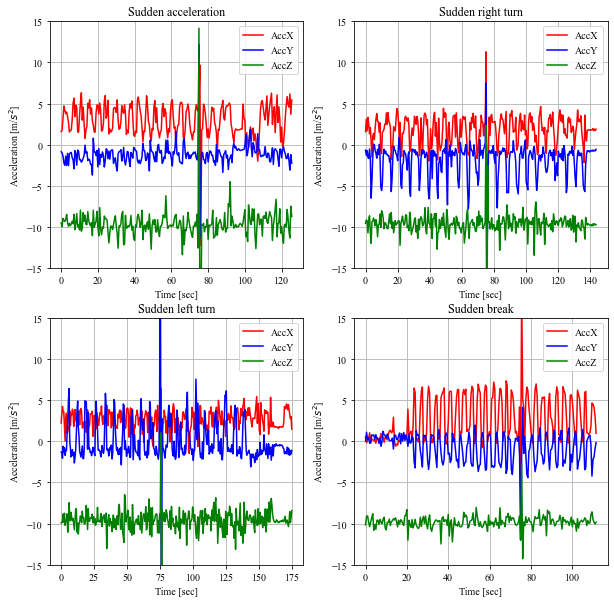

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family = 'Times New Roman')

tit = ("Sudden acceleration", "Sudden right turn", "Sudden left turn", "Sudden break")
plt.figure(figsize = (10, 10))

for i, df in zip(range(1, 5), [df1_shock, df2_shock, df3_shock, df4_shock]):
    plt.subplot(2, 2, i)
    t = returnTime(df)
    plt.plot(t, df.AccX, 'r', t, df.AccY, 'b', t, df.AccZ, 'g')
    plt.title(tit[i-1])
    plt.xlabel('Time [sec]')
    plt.ylabel('Acceleration [m/$s^2$]')
    plt.legend(['AccX', 'AccY', 'AccZ'])
    plt.ylim([-15, 15])
    plt.grid()
plt.show()

In [4]:
from scipy import signal

mpl.rc('font', family = 'Times New Roman', size = 15)

def stft(t, sig, nperseg, tit):
    sr = 1 / (t[1] - t[0])
    f, t, Z = signal.stft(sig, sr, nperseg = nperseg)
    plt.pcolormesh(t, f, np.abs(Z), vmin = 0, vmax = 1, shading = 'gouraud')
    plt.title(tit)
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')
    
def plotstft(tit, t, df, df_shock, nperseg):    
    fig = plt.figure(figsize = (10, 10))
    plt.subplot(3, 2, 1)
    stft(t, df.AccX, nperseg, 'AccX')
    plt.subplot(3, 2, 3)
    stft(t, df.AccY, nperseg, 'AccY')
    plt.subplot(3, 2, 5)
    stft(t, df.AccZ, nperseg, 'AccZ')
    plt.subplot(3, 2, 2)
    stft(t, df_shock.AccX, nperseg, 'AccX')
    plt.subplot(3, 2, 4)
    stft(t, df_shock.AccY, nperseg, 'AccY')
    plt.subplot(3, 2, 6)
    stft(t, df_shock.AccZ, nperseg, 'AccZ')
    plt.suptitle(tit, fontsize = 20)
    fig.tight_layout()
    plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
    plt.savefig('Data/STFTData/' + tit + '.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)
#     plt.show()

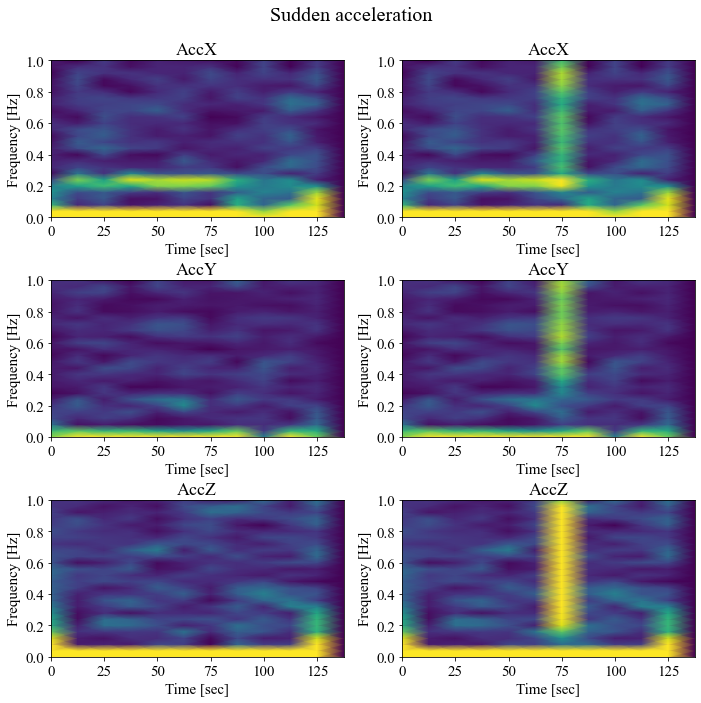

In [5]:
nperseg = 50

plotstft('Sudden acceleration', time1, df1, df1_shock, nperseg)

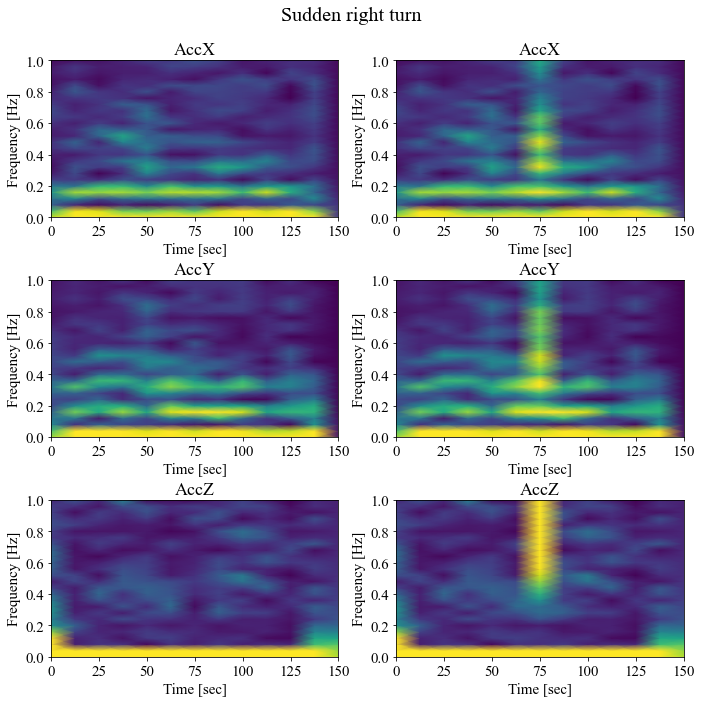

In [6]:
plotstft('Sudden right turn', time2, df2, df2_shock, nperseg)

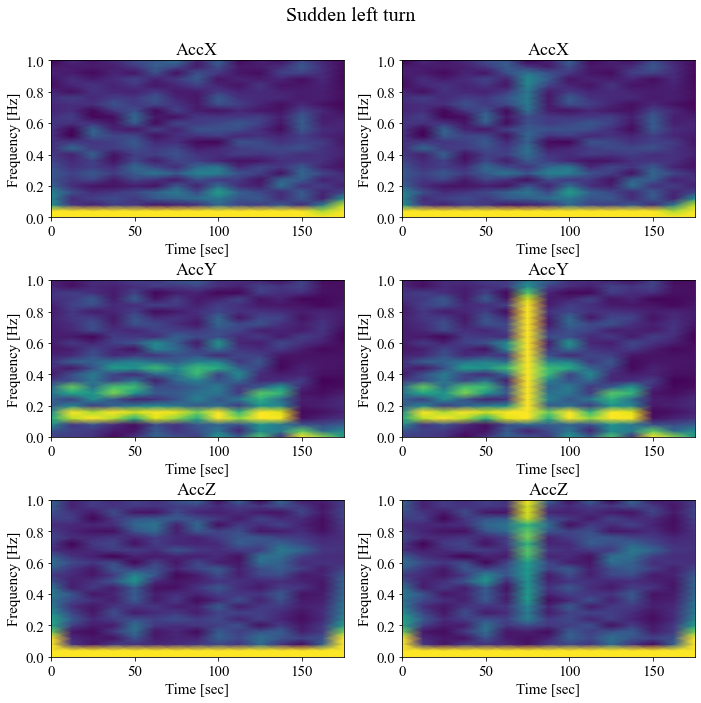

In [7]:
plotstft('Sudden left turn', time3, df3, df3_shock, nperseg)

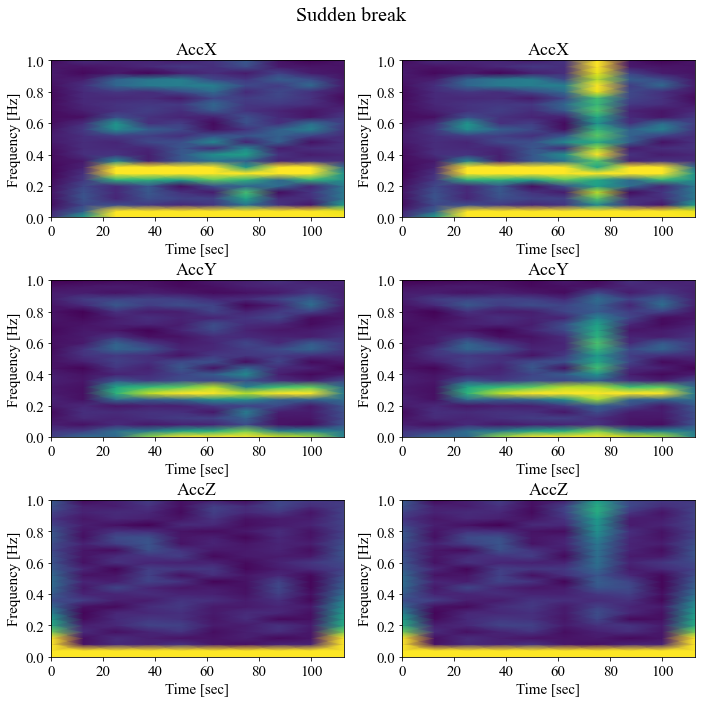

In [8]:
plotstft('Sudden break', time4, df4, df4_shock, nperseg)

In [9]:
def cwt(t, sig, w, tit):
    fs = 1 / (t[1] - t[0])
    freq = np.linspace(0.00001, fs / 2, 100)
    widths = w * fs / (2 * freq * np.pi)
    cwtmatr = signal.cwt(sig, signal.morlet2, widths, w = w)
    cwtm = np.absolute(cwtmatr)
    plt.pcolormesh(t, freq, cwtm)
    plt.title(tit)
    plt.xlabel('Time [sec]')
    plt.ylabel('Frequency [Hz]')

def plotcwt(tit, t, df, df_shock, w):
    fig = plt.figure(figsize = (10, 10))
    plt.subplot(3, 2, 1)
    cwt(t, df.AccX, w, 'AccX')
    plt.subplot(3, 2, 3)
    cwt(t, df.AccY, w, 'AccY')
    plt.subplot(3, 2, 5)
    cwt(t, df.AccZ, w, 'AccZ')
    plt.subplot(3, 2, 2)
    cwt(t, df_shock.AccX, w, 'AccX')
    plt.subplot(3, 2, 4)
    cwt(t, df_shock.AccY, w, 'AccY')
    plt.subplot(3, 2, 6)
    cwt(t, df_shock.AccZ, w, 'AccZ')
    plt.suptitle(tit, fontsize = 20)
    fig.tight_layout()
    plt.subplots_adjust(hspace = 0.4, wspace = 0.2)
    plt.savefig('Data/CWTData/' + tit + '.png', dpi = 300, bbox_inches = 'tight', pad_inches = 0)

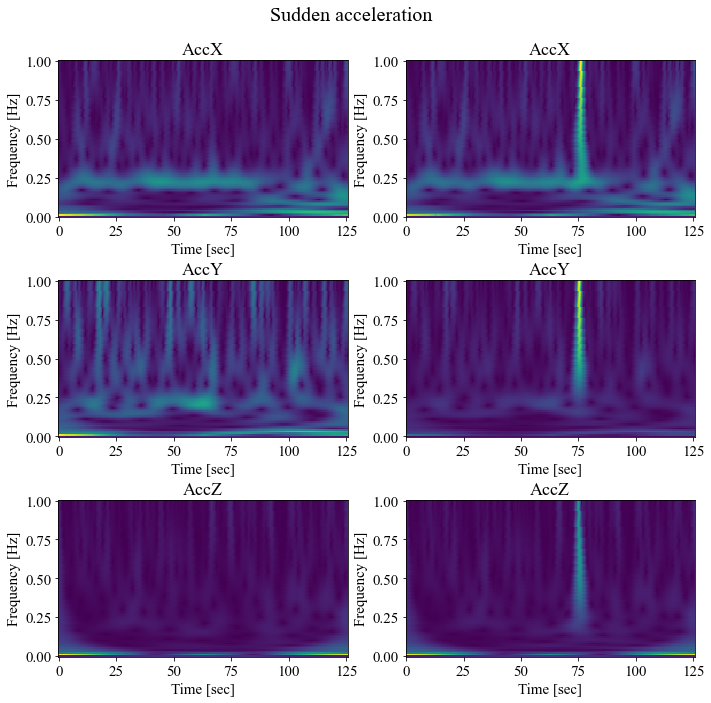

In [10]:
w = 5.

plotcwt('Sudden acceleration', time1, df1, df1_shock, w)

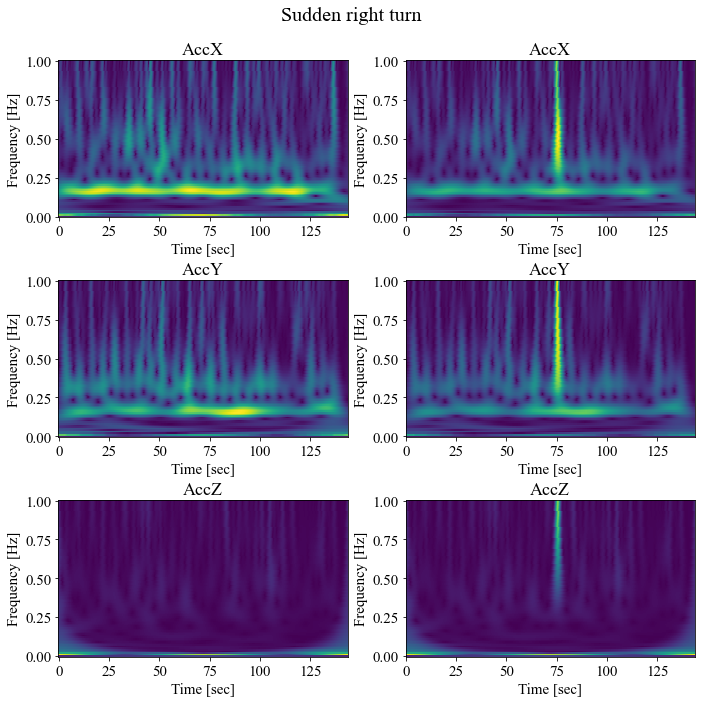

In [11]:
plotcwt('Sudden right turn', time2, df2, df2_shock, w)

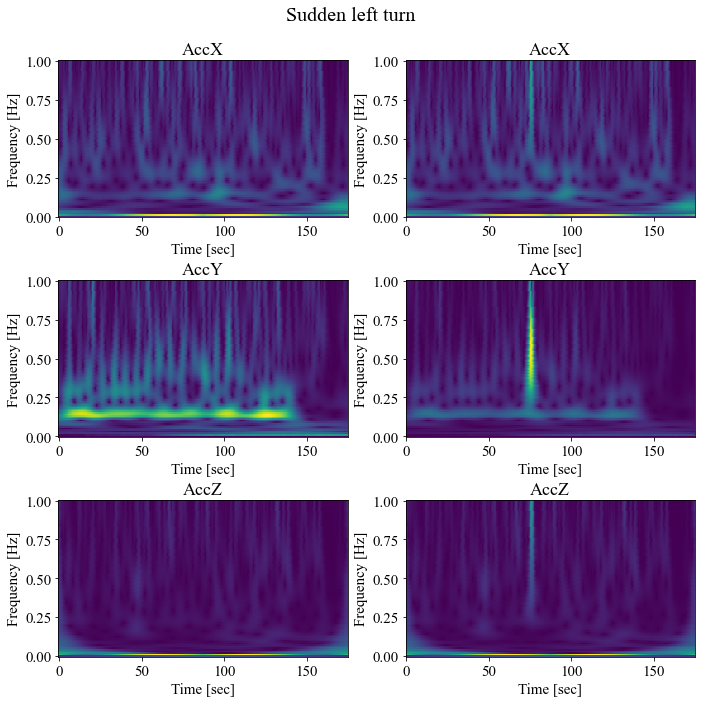

In [12]:
plotcwt('Sudden left turn', time3, df3, df3_shock, w)

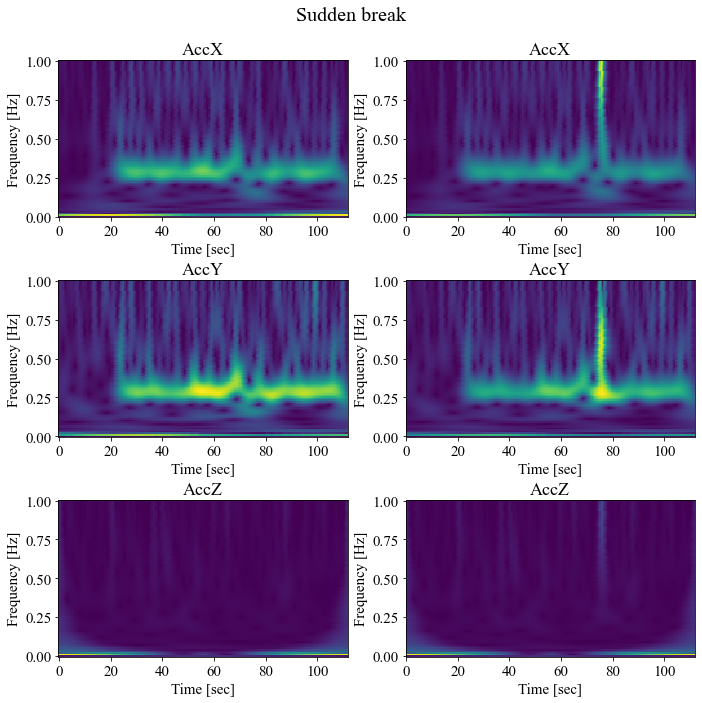

In [13]:
plotcwt('Sudden break', time4, df4, df4_shock, w)